# Lecture 1 : Handwritten Digit Classification

# Part 1 : The MNIST Dataset

## Clone the demo repo on code.vt.edu to access MNIST datafiles.

### Note that you cannot clone private Git repos inside of Google Colab.  

### This is a major limitation of Google Colab for serious software development.

In [1]:
!git clone https://code.vt.edu/jasonwil/cmda3634_demo.git

Cloning into 'cmda3634_demo'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 21 (delta 5), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (21/21), 24.64 MiB | 7.55 MiB/s, done.
Resolving deltas: 100% (5/5), done.


## Copy the MNIST files into our workspace.

In [2]:
!cp cmda3634_demo/*gz .
!gzip -d -k *gz

## The MNIST Training Set

### The MNIST training set has 60000 separate images and class labels.

### Each MNIST image has 28 rows and 28 columns.  

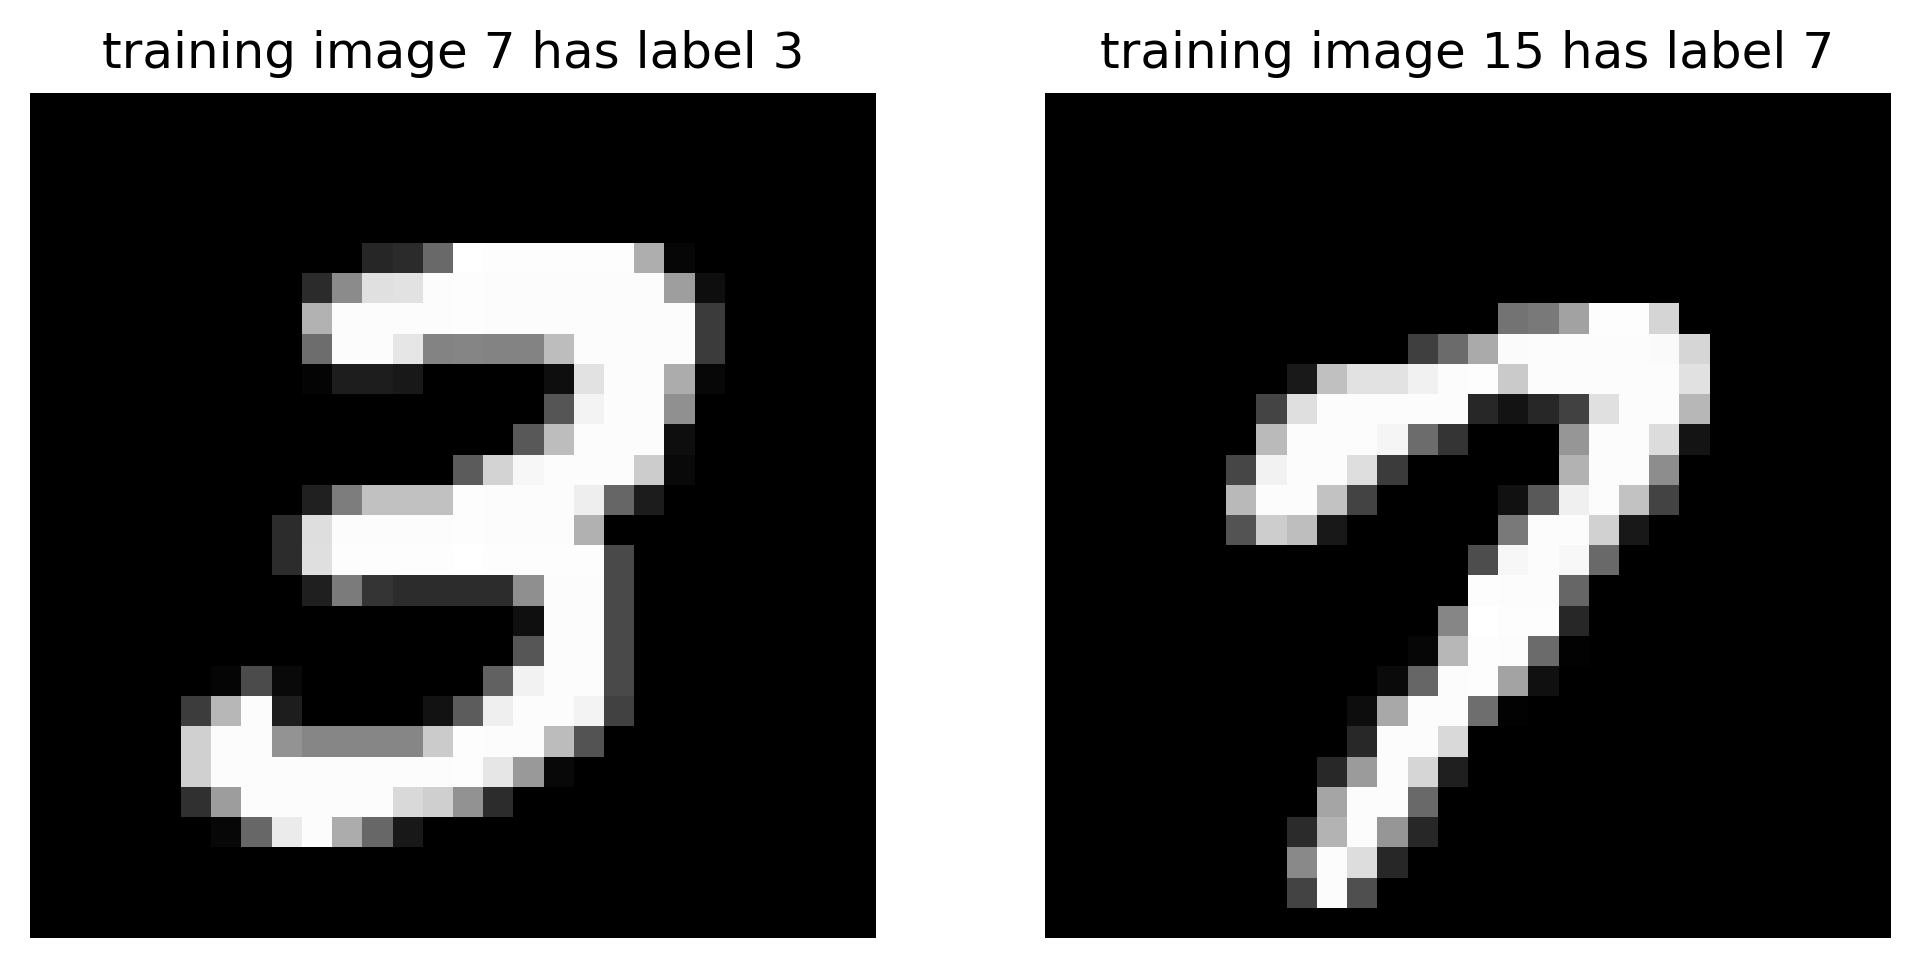

## The MNIST Test Set

### To test how well our classifier *generalizes* we need to run it on *test data*.
### It is critical that our *test data* is *separate* from our *training data*.
### Fortunately there is a MNIST test set with 10000 separate images and class labels.

# Part 2 : Nearest Neighbor Classification

### To classify a test image using nearest neighbor classification, choose the class of the nearest training image.  

### To find the distance between two MNIST images we think of the images as vectors $\mathbf{u}$, $\mathbf{v}$ in $\mathbb{R}^{784}$ and look at the length of the difference vector.
$$d(\mathbf{u},\mathbf{v}) = \| \mathbf{u} - \mathbf{v} \|$$

### The components of the vectors are the grayscale intensity values ($0-255$ where $0$ is black and $255$ is white).

### Consider test image 2342.  In this case the nearest training image 22165 has label 9.  Thus the nearest neighbor classifier would classify test image 2342 as a 9.  In this case the classifier gets the correct answer since test image 2342 is indeed a 9.

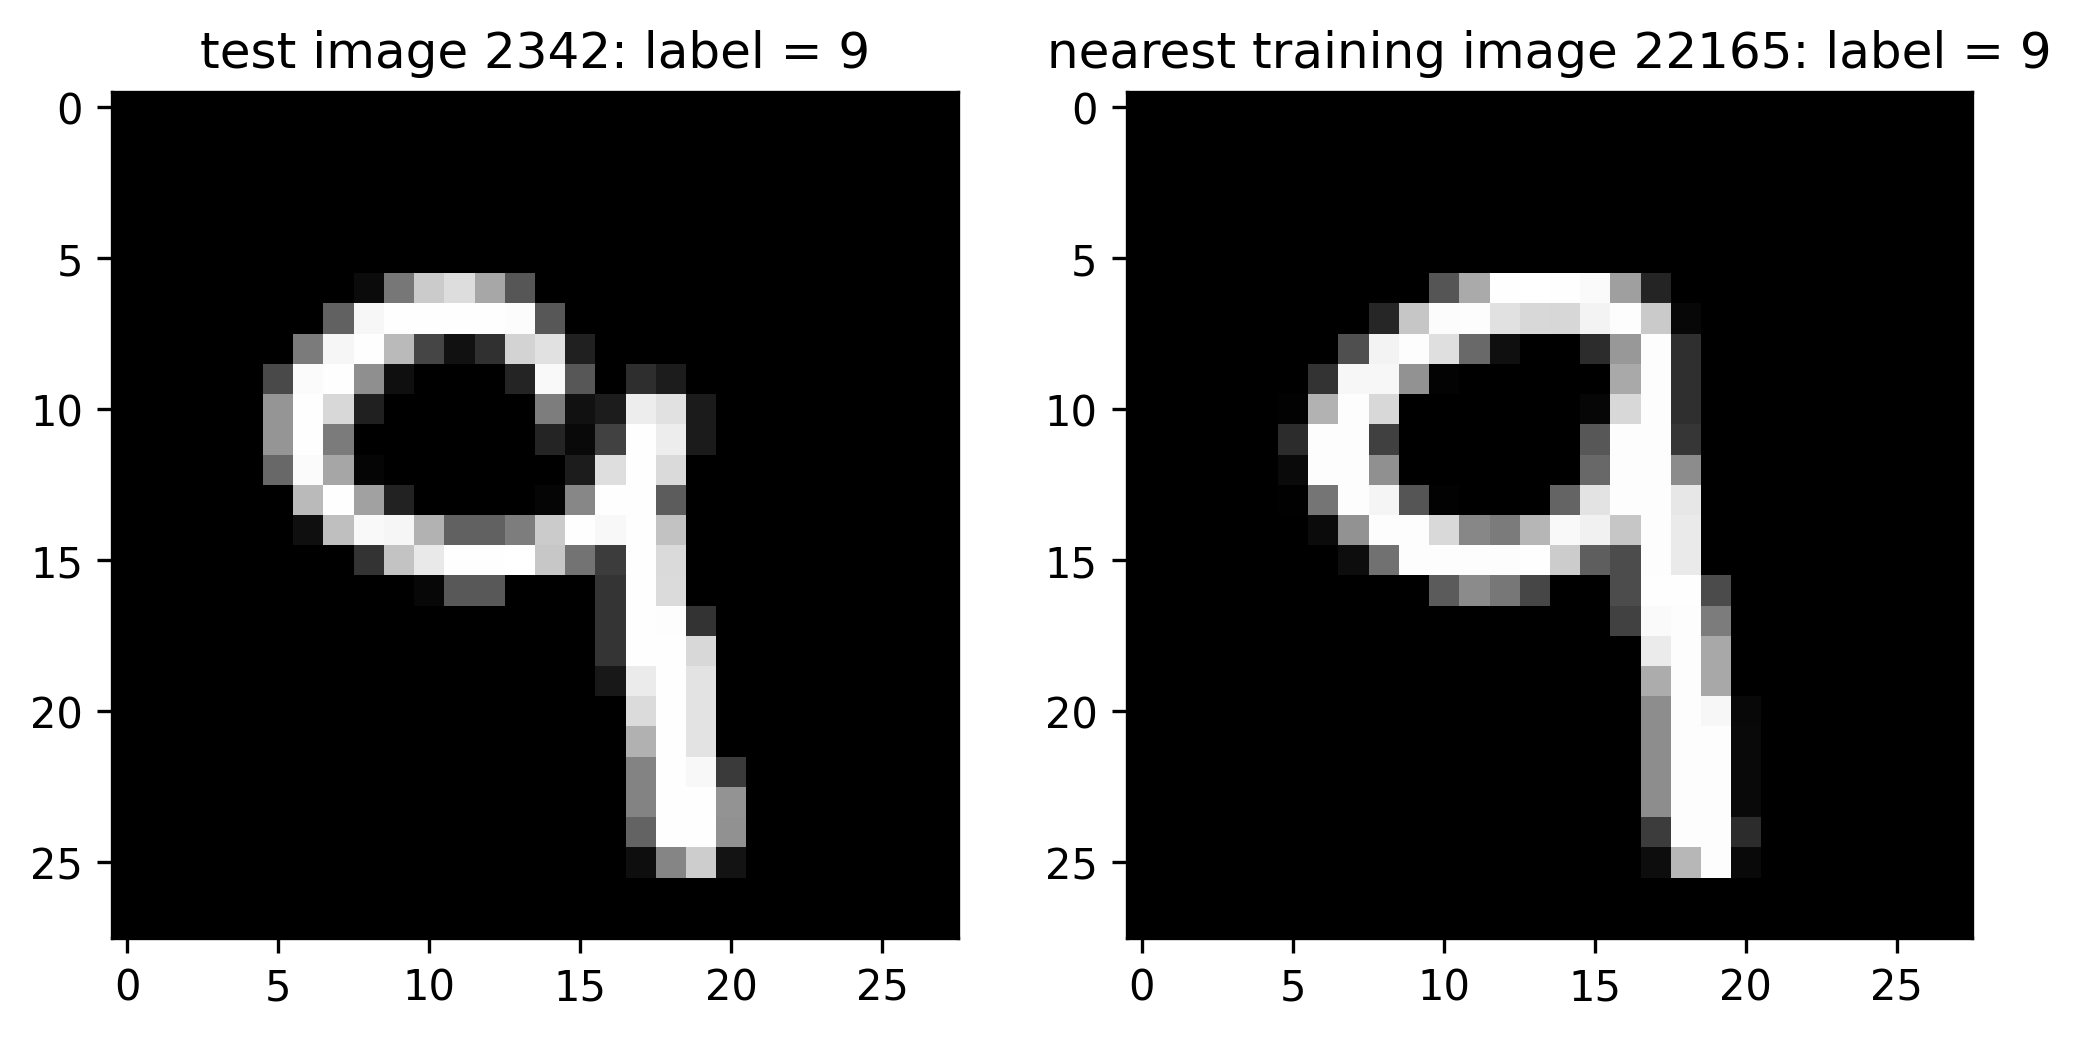

### Consider test image 1114.  In this case the nearest training image 50745 has label 8.  Thus the nearest neighbor classifier would classify test image 1114 as an 8.  In this case the classifier gets the incorrect answer since test image 1114 is actually a 3.

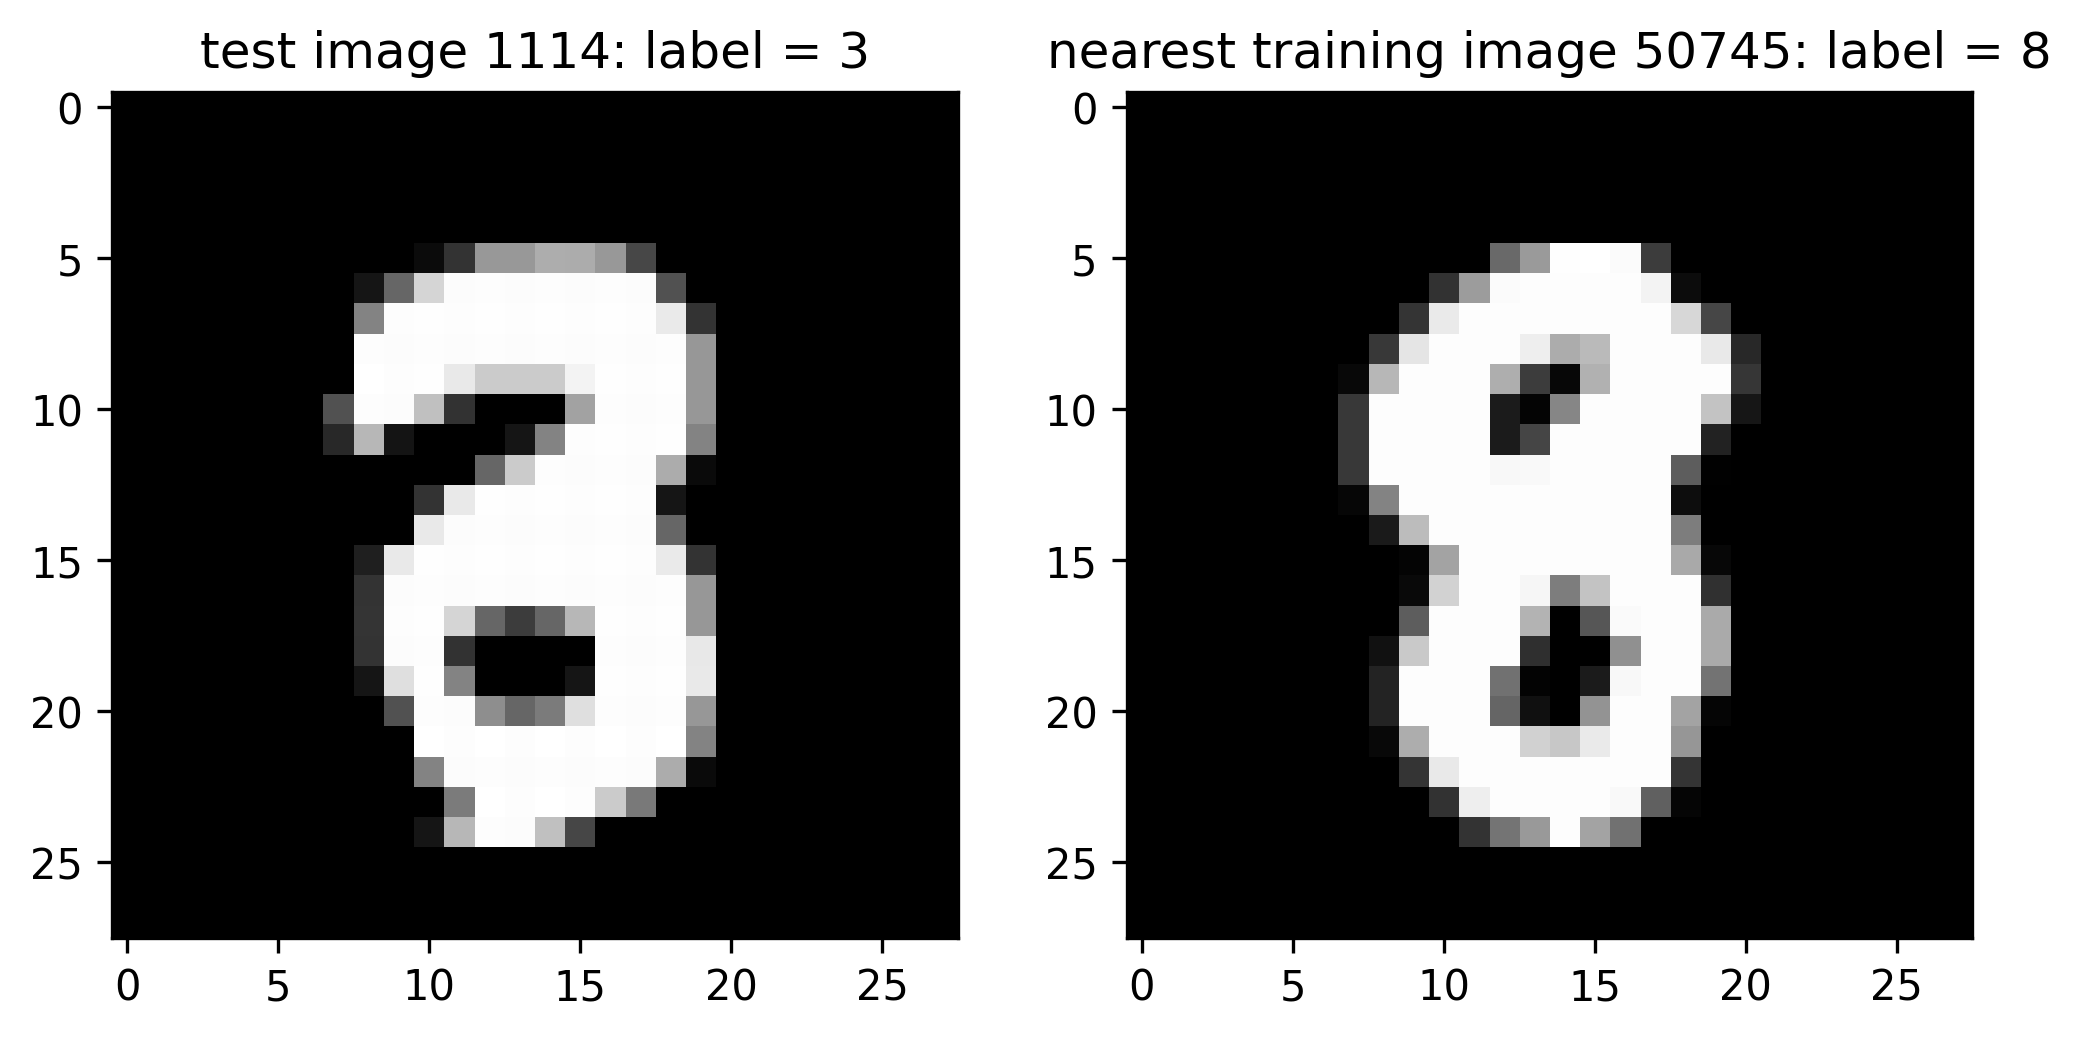

# Part 3 : Implementing the Digit Classifier in Python

## In classes like CMDA 2005 you have seen Python programs written as a collection of code cells.  

## This cell style of writing code is quite effective for short demonstrations but is not suitable for serious software development.

## Instead of developing Python software using code cells, we will write *Python scripts*.  

### One advantage of using Python scripts is that they can be run on any computer that has Python installed.


## We have already seen a Java version of Hello World.  Let's look at a Python script version.

## The first step is to create the script file.

In [3]:
%%writefile hello.py
print ('Hello World!\n')

Writing hello.py


## Next, we run the Python script *hello.py* using a Python interpreter.  

In [4]:
!python3 hello.py

Hello World!



## Here is a Python script that implements the MNIST digit classifier.  

### The script has one command line argument that specifies the number of test images to classify.

### Also note that script times the most computationally intensive part of the script (lines 47-54).

In [5]:
%%writefile nearest.py
import sys
import numpy as np
import gzip
import time # to time part of the code

# make sure a command line argument for the number of test images to classify
if (len(sys.argv) < 2):
    print ('command usage :',sys.argv[0],'num_classify')
    exit(1)
num_classify = int(sys.argv[1])
print ('number of digits to classify =',num_classify)

# Opens MNIST training image set and stores it as a 60000 x 784 matrix
f = gzip.open('train-images-idx3-ubyte.gz','r')
f.read(16) # skip file header
buf = f.read(60000*28*28)
data = np.frombuffer(buf,dtype=np.uint8)
train = data.reshape(60000,28*28).astype(np.int32)

# Opening and saving the 60000 training labels
f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8) #skip header
buf = f.read(60000)
train_labels = np.frombuffer(buf,dtype=np.uint8)

# Opens MNIST test image set and stores it as a 10000 x 784 matrix
f = gzip.open('t10k-images-idx3-ubyte.gz','r')
f.read(16) # skip header
buf = f.read(10000*28*28)
data = np.frombuffer(buf, dtype=np.uint8)
test = data.reshape(10000,28*28).astype(np.int32)

# Opening and saving the 10000 test labels
f = gzip.open('t10k-labels-idx1-ubyte.gz','r')
f.read(8) #skip header
buf = f.read(10000)
test_labels = np.frombuffer(buf,dtype=np.uint8)

# Allocate space to store the nearest neighbor indices
nearest = np.empty(num_classify,dtype='int32')

# time just the nearest neighbor code
start = time.process_time()

# find the index of the training image closest to the test image with the given index
for test_index in range(num_classify):
    min_dist_sq = np.inf
    for train_index in range(len(train)):
        diff = train[train_index]-test[test_index]
        dist_sq = np.dot(diff,diff)
        if (dist_sq < min_dist_sq):
            min_dist_sq = dist_sq
            nearest[test_index] = train_index

# record and print elapsed time
elapsed = time.process_time()-start
print ('Time to find nearest neighbors in Python =',np.round(elapsed,4),'seconds')

# count nearest neighbor classification errors
labels_diff = test_labels[:num_classify] - train_labels[nearest]
classify_errors = np.count_nonzero(labels_diff)
print ('number of classification errors =',classify_errors)
print ('classificiation rate =',(num_classify-classify_errors)/num_classify)


Writing nearest.py


## Let's run the script to classify 50 and then 100 test images.

In [6]:
!python3 nearest.py 50

number of digits to classify = 50
Time to find nearest neighbors in Python = 12.2815 seconds
number of classification errors = 0
classificiation rate = 1.0


In [7]:
!python3 nearest.py 100

number of digits to classify = 100
Time to find nearest neighbors in Python = 24.9251 seconds
number of classification errors = 0
classificiation rate = 1.0


## Despite the fact that we are using numpy on line 51 to compute distances between two images, the Python code runs quite slow!

## Loops implemented in native Python are particularly slow due to the fact that Python is interpreted (instead of compiled) and does runtime error checking.

## Estimate how long would it take to classify all 10000 test images in Python.

## **Answer:** $100*25 = 2500$ seconds.


# Part 4 : Implementing the Digit Classifier in C

### Many languages, including Java, have borrowed control structures and other basic features from C.

## To get started, here is a Hello World program in C.


In [8]:
%%writefile hello.c
#include <stdio.h>
int main (int argc, char** argv) {
    printf ("Hello World!\n");
}

Writing hello.c


## Like Java, C source code has to be first compiled before it can be run.  

### One big difference between C and Java is that C code is compiled to machine code that is ready to run directly on the hardware whereas Java code is compiled to Java bytecode that is interpreted by a Java virtual machine.

### This allows Java programs to run on different operating systems and processor models without needing to recompile the source code.  This portability does however come at the expense of performance since there is an additional layer of interpretation by the Java virtual machine running on the hardware.

### Although Java programs have gotten faster over the years because of features like just-in-time compilation, C and C++ remain the standard languages for high performance computing.


In [9]:
!gcc -o hello hello.c

## Once the C source code is compiled we can run the program directly (without an interpreter).

In [10]:
!./hello

Hello World!


## Here is C source code that implements the MNIST digit classifier.  

### The C program has one command line argument that specifies the number of test images to classify.

### Also note that the C program times the most computationally intensive part (lines 75-84).

### Compare lines 75-84 of the C code with lines 47-54 of the Python script.

### Note that the C code is longer than the Python script.

### Programs written in high level languages such as Python are shorter and easier to maintain than those written in low level languages such as C.  

### Later in the course we will talk about how to combine Python and C to get the best of both worlds!

In [11]:
%%writefile nearest.c
#include <stdio.h>
#include <stdlib.h>
#include <limits.h>
#include <time.h>

typedef unsigned char byte;

// calculates ||u-v||^2
int vec_dist_sq (byte* u, byte* v, int dim) {
    int dist_sq = 0;
    for (int i=0;i<dim;i++) {
        dist_sq += (u[i]-v[i])*(u[i]-v[i]);
    }
    return dist_sq;
}

// read byte data from a binary file
void read_bytes_bin (byte* data, int num_bytes, char* filename, int header_size) {
    byte header[header_size];
    FILE* fptr;
    int num_read;
    // open the binary file for reading
    fptr = fopen(filename,"rb");
    // need to check for null
    if (fptr == 0) {
        printf ("Error opening binary data file %s.\n",filename);
        exit(1);
    }
    // read header
    num_read = fread(header, sizeof(byte), header_size, fptr);
    // read data
    num_read = fread(data, sizeof(byte), num_bytes, fptr);
    if (num_read != num_bytes) {
        printf ("Warning : binary data file read error for %s.\n",filename);
    }
    // close the binary file
    fclose(fptr);
}

int main (int argc, char** argv) {

    // read the number of test images to classify from the command line
    if (argc < 2) {
        printf ("Command usage : %s %s\n",argv[0],"num_classify");
        return 1;
    }
    int num_classify = atoi(argv[1]);
    if (num_classify > 10000) {
        num_classify = 10000;
    }

    // read the data
    int num_train = 60000;
    int num_test = 10000;
    int dim = 784;
    byte* train_bytes = (byte*)malloc(num_train*dim*sizeof(byte));
    byte* test_bytes = (byte*)malloc(num_test*dim*sizeof(byte));
    int* nearest = (int*)malloc(num_test*sizeof(int));
    byte* train_labels = (byte*)malloc(num_train*sizeof(byte));
    byte* test_labels = (byte*)malloc(num_test*sizeof(byte));
    char train_images_file[] = "train-images-idx3-ubyte";
    char train_labels_file[] = "train-labels-idx1-ubyte";
    char test_images_file[] = "t10k-images-idx3-ubyte";
    char test_labels_file[] = "t10k-labels-idx1-ubyte";
    read_bytes_bin(train_bytes,num_train*dim,train_images_file,16);
    read_bytes_bin(train_labels,num_train,train_labels_file,8);
    read_bytes_bin(test_bytes,num_test*dim,test_images_file,16);
    read_bytes_bin(test_labels,num_test,test_labels_file,8);

    // start timer
    clock_t begin = clock();

    // for each test vector find the nearest training vector
    for (int i=0;i<num_classify;i++) {
        int min_dist_sq = INT_MAX;
        for (int j=0;j<num_train;j++) {
            int dist_sq = vec_dist_sq(test_bytes+i*dim,train_bytes+j*dim,dim);
            if (dist_sq < min_dist_sq) {
                min_dist_sq = dist_sq;
                nearest[i] = j;
            }
        }
    }

    // stop timer
    clock_t end = clock();
    double elapsed_time = (double)(end - begin) / CLOCKS_PER_SEC;

    // print results
    int classify_errors = 0;
    for (int i=0;i<num_classify;i++) {
        if (test_labels[i] != train_labels[nearest[i]]) {
            classify_errors += 1;
        }
    }
    printf ("number of MNIST training images = %d\n",num_train);
    printf ("number of MNIST test images to classify = %d\n",num_classify);
    printf ("elapsed time = %.2f seconds\n",elapsed_time);
    printf ("number of classification errors = %d\n",classify_errors);
    printf ("classificiation rate = %.4f\n",1.0*(num_classify-classify_errors)/num_classify);

    // free dynamically allocated memory
    free (train_bytes);
    free (test_bytes);
    free (nearest);
    free (train_labels);
    free (test_labels);
}

Writing nearest.c


## This time we compile the C source code with the optimization flags -O3 and -march=native to improve performance.

In [12]:
!gcc -O3 -march=native -o nearest nearest.c

## Let's run the C program to classify 50 and then 100 test images.

In [13]:
! ./nearest 50

number of MNIST training images = 60000
number of MNIST test images to classify = 50
elapsed time = 0.30 seconds
number of classification errors = 0
classificiation rate = 1.0000


In [22]:
! ./nearest 100

number of MNIST training images = 60000
number of MNIST test images to classify = 100
elapsed time = 0.63 seconds
number of classification errors = 0
classificiation rate = 1.0000


## Question : About how long would it take to classify all 10000 tests images in C?

## **Answer:** $100*0.63 = 63$ seconds

## Comparing Sequential Runtimes : Python vs C

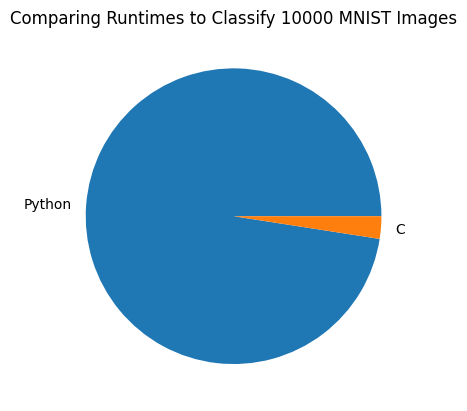

In [3]:
import matplotlib.pyplot as plt
import numpy as np
y = np.array([2500,63])
mylabels = ["Python", "C"]
plt.title('Comparing Runtimes to Classify 10000 MNIST Images')
plt.pie(y,labels=mylabels);

# Part 5 : Implementing the Digit Classifier in CUDA to run on a GPU

## We will learn to program Nvidia GPUs using CUDA (Compute Unified Device Architecture).  

## Google Colab gives free access (be responsible!) to a Nvidia T4 GPU (Turing Class).  

## Here is a picture of a Turing Class GPU (not T4).

## Such a GPU is capaple of performing thousands of calculations simultaneously!

## The Nvidia T4 is a version of the TU104 GPU (shown below) that has 40 SMs.  

## The TU102 shown here has 72 SMs (stream multiprocessors).  


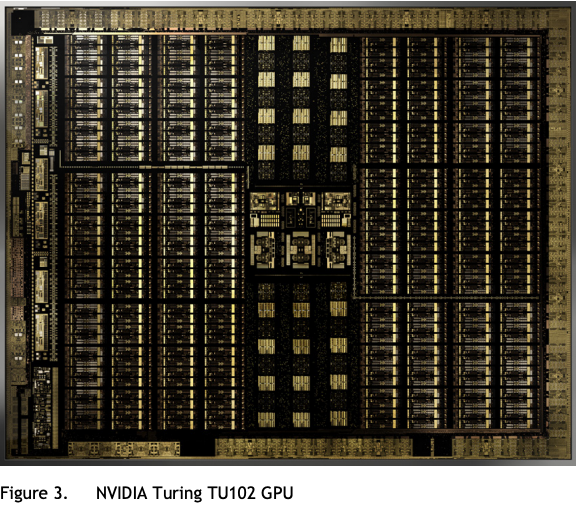

# To compile and execute the GPU code we need to change the runtime type to T4 GPU.

# Be sure to switch back to a CPU runtime after compiling and running the code below!

# Since Google Colab is free we have limited access to the T4 GPUs.

# If you stay on a GPU too long you can temporarily lose access to the free GPUs.

## Note that since we switched runtimes we need to clone the demo repo again.

## Here is CUDA source code that implements the MNIST digit classifier.  

### Note that this code takes advantage of the incredible ability of GPUs to perform lightning fast matrix multiplication.

In [1]:
%%writefile gpu_nearest.cu
#include <stdio.h>
#include <stdlib.h>
#include <float.h>
#include <cuda.h>
#include <cublas_v2.h>

typedef unsigned char byte;

// read byte data from a binary file
void read_bytes_bin (byte* data, int num_bytes, char* filename, int header_size) {
    byte header[header_size];
    FILE* fptr;
    int num_read;
    // open the binary file for reading
    fptr = fopen(filename,"rb");
    // need to check for null
    if (fptr == 0) {
        printf ("Error opening binary data file %s.\n",filename);
        exit(1);
    }
    // read header
    num_read = fread(header, sizeof(byte), header_size, fptr);
    // read data
    num_read = fread(data, sizeof(byte), num_bytes, fptr);
    if (num_read != num_bytes) {
        printf ("Warning : binary data file read error for %s.\n",filename);
    }
    // close the binary file
    fclose(fptr);
}

__global__ void trainDotProds (float *train, int num_train, int dim, float* dot_prods) {
    int t = blockIdx.x*blockDim.x + threadIdx.x;
    if (t < num_train) {
        float result = 0;
        for (int i=0;i<dim;i++) {
            float term = train[i*num_train+t];
            result += term*term;
        }
        dot_prods[t] = result;
    }
}

__global__ void calcNearest(float* train_dot_prods, int num_train,
        float* test_train_dot_prods, int num_test,
        int* nearest) {

    int t = blockIdx.x*blockDim.x + threadIdx.x;
    if (t < num_test) {
        float min_dist_sq = FLT_MAX;
        int nearest_idx;
        for (int i=0;i<num_train;i++) {
            float term1 = train_dot_prods[i];
            float term2 = test_train_dot_prods[i*num_test+t];
            float dist_sq = term1-2*term2;
            if (dist_sq < min_dist_sq) {
                min_dist_sq = dist_sq;
                nearest_idx = i;
            }
        }
        nearest[t] = nearest_idx;
    }
}

int main (int argc, char* argv[]) {

    int num_train = 60000;
    int num_test = 10000;
    int dim = 784;
    byte* train_bytes = (byte*)malloc(num_train*dim*sizeof(byte));
    byte* test_bytes = (byte*)malloc(num_test*dim*sizeof(byte));
    int* nearest = (int*)malloc(num_test*sizeof(int));
    byte* train_labels = (byte*)malloc(num_train*sizeof(byte));
    byte* test_labels = (byte*)malloc(num_test*sizeof(byte));
    char train_images_file[] = "train-images-idx3-ubyte-c";
    char train_labels_file[] = "train-labels-idx1-ubyte";
    char test_images_file[] = "t10k-images-idx3-ubyte-c";
    char test_labels_file[] = "t10k-labels-idx1-ubyte";
    read_bytes_bin(train_bytes,num_train*dim,train_images_file,16);
    read_bytes_bin(train_labels,num_train,train_labels_file,8);
    read_bytes_bin(test_bytes,num_test*dim,test_images_file,16);
    read_bytes_bin(test_labels,num_test,test_labels_file,8);

    // translate input data from byte to float matrices
    // good to work with floating point data in case we want to further
    // process the data (such as dimensionality reduction, etc.)
    float* test = (float*)malloc(num_test*dim*sizeof(float));
    for (int i=0;i<num_test*dim;i++) {
        test[i] = test_bytes[i];
    }
    float* train = (float*)malloc(num_train*dim*sizeof(float));
    for (int i=0;i<num_train*dim;i++) {
        train[i] = train_bytes[i];
    }

    // allocate device memory
    float* d_test;
    float* d_train;
    float* d_train_dot_prods;
    float* d_test_train_dot_prods;
    int* d_nearest;
    cudaMalloc(&d_test,num_test*dim*sizeof(float));
    cudaMalloc(&d_train,num_train*dim*sizeof(float));
    cudaMalloc(&d_train_dot_prods,num_train*sizeof(float));
    cudaMalloc(&d_test_train_dot_prods,num_test*num_train*sizeof(float));
    cudaMalloc(&d_nearest,num_test*sizeof(int));

    // copy data to device
    cudaMemcpy(d_test,test,num_test*dim*sizeof(float),cudaMemcpyHostToDevice);
    cudaMemcpy(d_train,train,num_train*dim*sizeof(float),cudaMemcpyHostToDevice);

    // setup CUBLAS
    float alpha = 1.0, beta = 0;
    cublasHandle_t handle;
    cublasCreate(&handle);
    cublasSetMathMode(handle, CUBLAS_TENSOR_OP_MATH);

    // for timing kernel execution
    cudaEvent_t tic, toc;
    cudaEventCreate(&tic);
    cudaEventCreate(&toc);
    cudaEventRecord(tic);

    // use CUBLAS to compute test/training dot products
    cublasSgemm(handle, CUBLAS_OP_N, CUBLAS_OP_T,
            num_test, num_train, dim, &alpha,
            d_test, num_test,
            d_train, num_train, &beta,
            d_test_train_dot_prods, num_test);

    // launch kernel to compute training dot products
    int B = 128;
    int G = (num_train+B-1)/B;
    trainDotProds <<< G, B >>> (d_train,num_train,dim,d_train_dot_prods);

    // launch kernel to compute nearest neighbors
    G = (num_test+B-1)/B;
    calcNearest <<< G, B >>>   (d_train_dot_prods, num_train,
            d_test_train_dot_prods, num_test,
            d_nearest);
    cudaEventRecord(toc);

    // copy nearest neighbor indices from device to host
    cudaMemcpy(nearest, d_nearest, num_test*sizeof(int),cudaMemcpyDeviceToHost);

    // calculate elapsed time
    cudaEventSynchronize(toc);
    float milliseconds = 0;
    cudaEventElapsedTime(&milliseconds, tic, toc);
    double elapsed_time = milliseconds/1000.0;

    // print results
    int classify_errors = 0;
    for (int i=0;i<num_test;i++) {
        if (test_labels[i] != train_labels[nearest[i]]) {
            classify_errors += 1;
        }
    }
    printf ("number of MNIST training images = %d\n",num_train);
    printf ("number of MNIST test images = %d\n",num_test);
    printf ("elapsed time = %.4f seconds\n",elapsed_time);
    printf ("number of classification errors = %d\n",classify_errors);
    printf ("classificiation rate = %.4f\n",1.0*(num_test-classify_errors)/num_test);

    // free dynamically allocated memory
    free (train_bytes);
    free (test_bytes);
    free (nearest);
    free (train_labels);
    free (test_labels);
    free (train);
    free (test);
    cudaFree(d_test);
    cudaFree(d_train);
    cudaFree(d_train_dot_prods);
    cudaFree(d_test_train_dot_prods);
    cudaFree(d_nearest);
}

Writing gpu_nearest.cu


## Note that since we switched runtimes we need to clone the demo repo again.

In [2]:
!git clone https://code.vt.edu/jasonwil/cmda3634_demo.git

Cloning into 'cmda3634_demo'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 21 (delta 5), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (21/21), 24.64 MiB | 6.35 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [3]:
!cp cmda3634_demo/*gz .
!gzip -d -k *gz

In [4]:
!nvcc -O3 -arch=sm_75 -o gpu_nearest gpu_nearest.cu -lcublas

In [6]:
!./gpu_nearest

number of MNIST training images = 60000
number of MNIST test images = 10000
elapsed time = 0.1268 seconds
number of classification errors = 309
classificiation rate = 0.9691


# Be sure to switch back to a CPU runtime now!

## Note that it takes around an **eighth of a second** to classify 10000 test images on the T4 GPU when using cuBLAS for the large matrix multiplication.

# Comparing Runtimes : Sequential vs Parallel

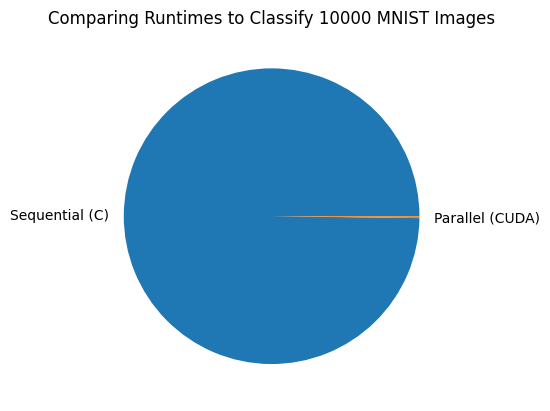

In [2]:
import matplotlib.pyplot as plt
import numpy as np
y = np.array([63,0.13])
mylabels = ["Sequential (C)", "Parallel (CUDA)"]
plt.title('Comparing Runtimes to Classify 10000 MNIST Images')
plt.pie(y,labels=mylabels);

## We can classify even faster using the more modern Nvidia V100 and Nvidia A100 gpus on ARC (ARC stands for Advanced Research Cluster here at Virginia Tech).

## We will learn how to access and run code on remote machines such as the ones at ARC throughout the semester.

## In fact, when using an A100 we can classify 10000 test images using **one million training images** in around a **quarter of a second**.  

    [jasonwil@tinkercliffs2]$ interact -A cmda3634_rjh -p dgx_normal_q -t 10 --gres=gpu:1
    [jasonwil@tc-dgx007]$ module load CUDA/11.8.0
    [jasonwil@tc-dgx007]$ nvcc -O3 -arch=sm_80 -o gpu_nearest gpu_nearest.cu -lcublas
    [jasonwil@tc-dgx007]$ ./gpu_nearest
    number of MNIST training images = 1000000
    number of MNIST test images = 10000
    elapsed time = 0.27 seconds
    number of classification errors = 235
    classificiation rate = 0.9765
    [jasonwil@tinkercliffs2 work]$

## Note that the A100 was released in 2020.

## The Nvidia H100 is a GPU which was released in 2023 and offers nearly double the computation speed of the A100.

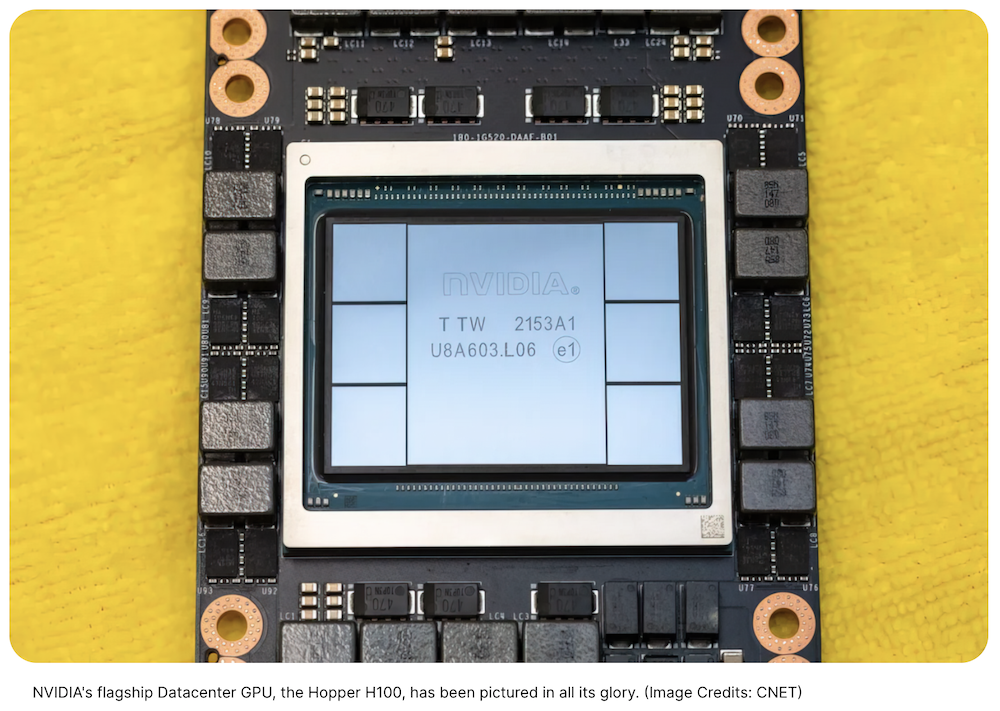